In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("../Scripts/data/insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
df.corr(method="spearman")

,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


In [9]:
stats.pearsonr(df["age"],df["charges"])

(0.29900819333064754, 4.8866933317203816e-29)

In [10]:
stats.spearmanr(df["age"],df["charges"])

SpearmanrResult(correlation=0.5343921337718459, pvalue=1.130692027803638e-99)

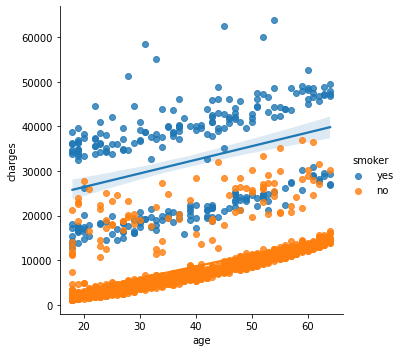

In [11]:
sns.lmplot(x="age", y="charges", hue="smoker",data = df)

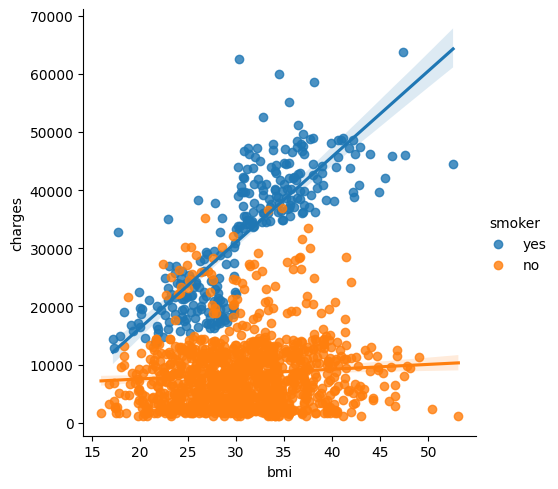

In [12]:
sns.lmplot(x="bmi", y="charges", hue="smoker",data = df)

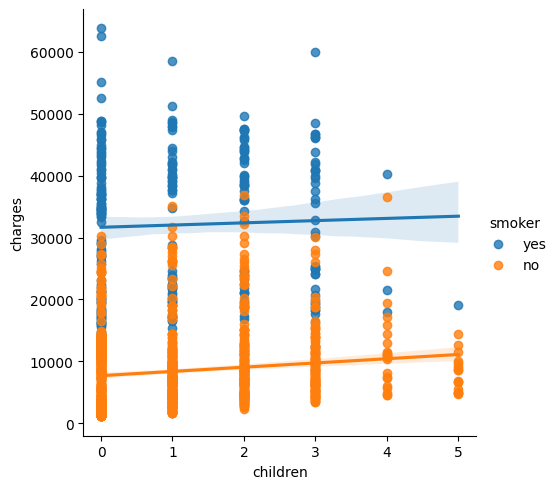

In [13]:
sns.lmplot(x="children", y="charges", hue="smoker",data = df)

In [14]:
df[["no","yes"]] = pd.get_dummies(df["smoker"])

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
no            uint8
yes           uint8
dtype: object

In [17]:
X=df.loc[:,["age","bmi","no","yes"]]
y=df["charges"]

In [18]:
X

,age,bmi,no,yes
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,1,0
3,33,22.705,1,0
4,32,28.880,1,0
...,...,...,...,...
1333,50,30.970,1,0
1334,18,31.920,1,0
1335,18,36.850,1,0
1336,21,25.800,1,0


In [19]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
X_train

,age,bmi,no,yes
332,61,31.160,1,0
355,46,27.600,1,0
138,54,31.900,1,0
381,55,30.685,0,1
292,25,45.540,0,1
...,...,...,...,...
1095,18,31.350,1,0
1130,39,23.870,1,0
1294,58,25.175,1,0
860,37,47.600,0,1


In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
model.coef_

array([   264.24499688,    332.38712163, -11830.27033301,  11830.27033301])

In [25]:
model.intercept_

-229.27869902754537

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([ 8199.32161485,  7431.53224721, 37448.89919964,  8653.02727106,
       27231.44349732, 11184.1883801 ,   444.80195234, 17451.26461403,
        1086.28421375, 10424.64233492, 27638.58730835,  8942.21789096,
        5438.89080673, 37832.85609181, 41056.97246424, 36963.66100392,
       15074.73816658, 36195.84675295,  9419.17958643, 31899.75426509,
        2490.6280971 , 10138.80599921,  3065.67440642,  6984.51027604,
       10499.42667247, 13072.09193466, 15461.93875031,  5179.63438149,
        9201.46325694,  2715.00875791,  8249.19350717, 13580.63593631,
        5079.93483389,  2498.92395106,  4782.43453595, 13062.14520435,
        2264.61591365,  9241.3607708 , 33362.23271694, 32813.8382033 ,
        2467.37758748,  4174.17716262, 14637.62974792, 11993.48190088,
        8543.37546353, 12671.55162901,  4667.77480307,  2623.58294575,
       34919.49126514,  8892.38747088, 16653.53828692,  2459.07067426,
       12277.72542138,  1380.47446455, 14182.25939128, 11825.65128779,
      

In [28]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

In [29]:
mean_absolute_error(y_pred,y_test)

4203.57998268399

In [30]:
mean_squared_error(y_pred,y_test)

34382251.77765593

In [31]:
np.sqrt(mean_squared_error(y_pred,y_test))

5863.638100842849

In [32]:
r2_score(y_test,y_pred)

0.7655078324224212